## Idegsejt szimulációja

... még nem volt időm beírni... Lásd jegyzetek + Izhikevich-könyv:

https://www.izhikevich.org/publications/dsn.pdf

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Na-csatornák
Vhalf_Na = -20
k_Na     = 15
g_Na     = 20
E_Na     = 60

# K-csatornák
Vhalf_K  = -45
k_K      = 5
g_K      = 10
E_K      = -90

# Leak
g_L      = 8
E_L      = -78

In [3]:
# Steady-state aktiváció (szigmoid)
def m_inf(V):
    return 1/(1+np.exp((Vhalf_Na-V)/k_Na))

def n_inf(V):
    return 1/(1+np.exp((Vhalf_K-V)/k_K))

# Áramok (perzisztens Na, K és L)
def I_Nap(V):
    return g_Na*m_inf(V)*(V-E_Na)

def I_K(V,n):
    return g_K*n*(V-E_K)

def I_L(V):
    return g_L*(V-E_L)

In [4]:
V = -61
n = 0.04
I = np.zeros(15000)
I[1000:1500] = 40
I[2600:3100] = 50
I[8000:8500] = 70

Vt = [V]
nt = [n]

def dV(I,V,n):
    return I-(I_Nap(V)+I_K(V,n)+I_L(V))

def dn(V,n):
    return n_inf(V)-n

dt = 1e-3
for i in range(len(I)):
    V += dV(I[i],V,n)*dt
    n += dn(V,n)*dt
    
    Vt += [V]
    nt += [n]

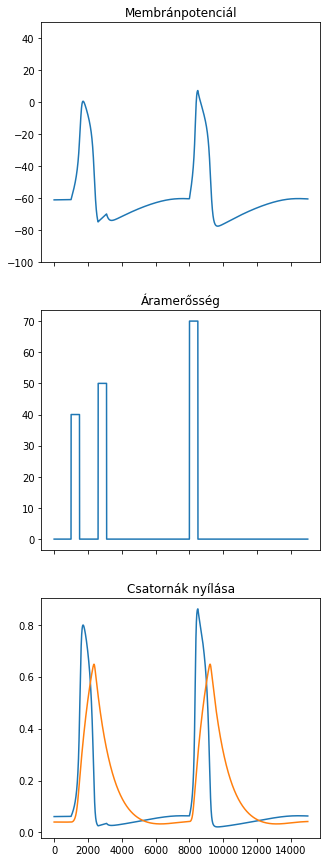

In [5]:
f,ax = subplots(3,1,sharex=True)
f.set_size_inches(5,15)
ax[0].set_title("Membránpotenciál")
ax[0].plot(Vt)
ax[1].set_title("Áramerősség")
ax[1].plot(I)
ax[2].set_title("Csatornák nyílása")
ax[2].plot(m_inf(np.array(Vt)))
ax[2].plot(nt)
ax[0].set_ylim([-100,50]);

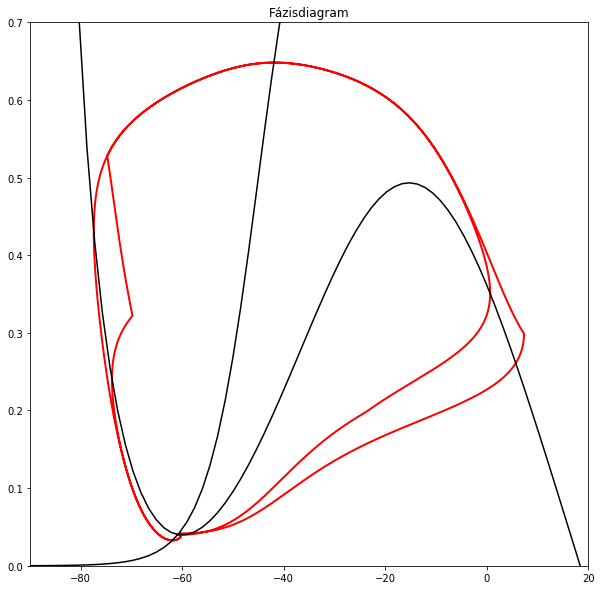

In [6]:
V = np.linspace(-100,50,100)
n = np.linspace(0,1,100)

V_nc = -(I_L(V)+I_Nap(V))/(g_K*(V-E_K))
n_nc = n_inf(V)

f,ax = subplots(1)
f.set_size_inches(10,10)
ax.set_title("Fázisdiagram")
ax.plot(Vt,nt,c='red',lw=2)
ax.plot(V,n_nc,c='black')
ax.plot(V,V_nc,c='black')
ax.set_xlim([-90,20])
ax.set_ylim([0,0.7]);